In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
# Load the dataset
file_path = r'online_retail_II.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
data.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [5]:
data.describe().round(2)

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [6]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [7]:
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
data['Country'].value_counts()

# data['Country'].value_counts().plot(kind='bar')

Country
United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169


In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [11]:
data.duplicated().sum()

26479

In [12]:
data.drop_duplicates( inplace=True)

In [13]:
data.duplicated().sum()

0

<AxesSubplot: xlabel='Quantity', ylabel='Price'>

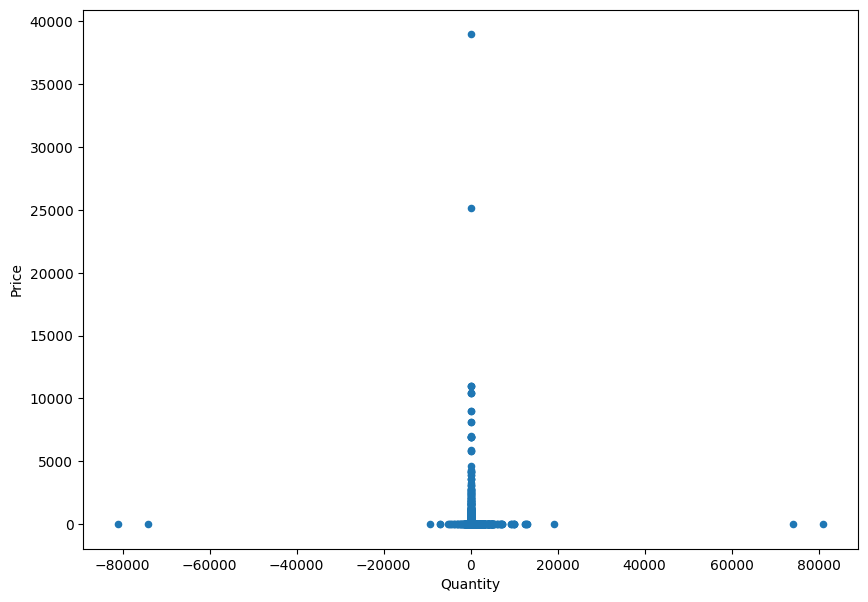

In [14]:
data.plot(x='Quantity', y='Price', kind='scatter', figsize=(10,7))

In [15]:
data['InvoiceDate']

0          2009-12-01 07:45:00
1          2009-12-01 07:45:00
2          2009-12-01 07:45:00
3          2009-12-01 07:45:00
4          2009-12-01 07:45:00
                  ...         
1067366    2011-12-09 12:50:00
1067367    2011-12-09 12:50:00
1067368    2011-12-09 12:50:00
1067369    2011-12-09 12:50:00
1067370    2011-12-09 12:50:00
Name: InvoiceDate, Length: 797885, dtype: object

In [16]:
data.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [17]:
# Data Cleaning
cleaned_data = data.dropna(subset=['Customer ID'])  # Remove rows with missing Customer ID
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'])  # Convert InvoiceDate to datetime
cleaned_data = cleaned_data[(cleaned_data['Quantity'] > 0) & (cleaned_data['Price'] > 0)]  # Remove negative or zero Quantity/Price

In [18]:
cleaned_data['Customer ID'].value_counts().sum()

779425

In [19]:

cleaned_data['InvoiceDate']

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                  ...        
1067366   2011-12-09 12:50:00
1067367   2011-12-09 12:50:00
1067368   2011-12-09 12:50:00
1067369   2011-12-09 12:50:00
1067370   2011-12-09 12:50:00
Name: InvoiceDate, Length: 779425, dtype: datetime64[ns]

C:\Users\sawsa\AppData\Local\Temp\ipykernel_21408\54190679.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cleaned_data['Quantity'], cleaned_data['Price'], c='blue', cmap='coolwarm')


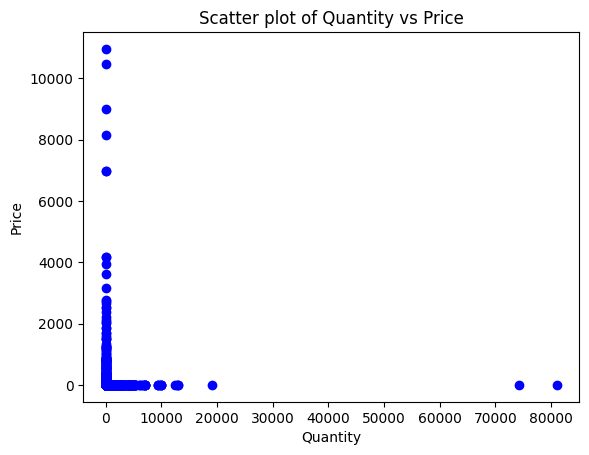

In [20]:
# Assuming 'Quantity' and 'Price' are the columns you want to plot
plt.scatter(cleaned_data['Quantity'], cleaned_data['Price'], c='blue', cmap='coolwarm')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Scatter plot of Quantity vs Price')
plt.show()

In [21]:
cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['Price']  # Calculate TotalPrice this code from Yasmin notebook

C:\Users\sawsa\AppData\Local\Temp\ipykernel_21408\338575133.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cleaned_data['Quantity'], cleaned_data['TotalPrice'], c='blue', cmap='coolwarm')


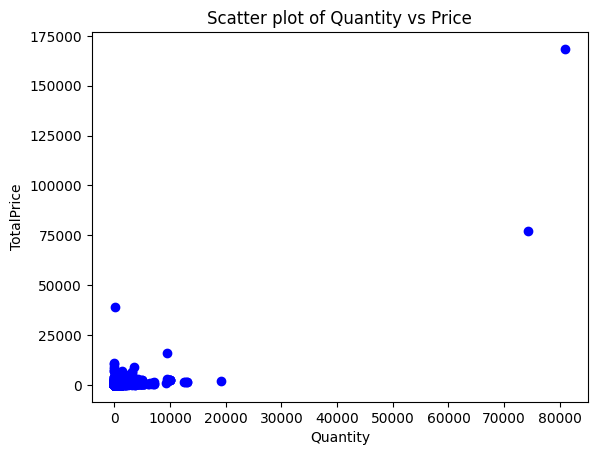

In [22]:
# Assuming 'Quantity' and 'Price' are the columns you want to plot
plt.scatter(cleaned_data['Quantity'], cleaned_data['TotalPrice'], c='blue', cmap='coolwarm')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.title('Scatter plot of Quantity vs Price')
plt.show()

In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  float64       
 7   Country      779425 non-null  object        
 8   TotalPrice   779425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 59.5+ MB


In [24]:
# Check the structure of cleaned_data
cleaned_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [25]:
cleaned_data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalPrice'],
      dtype='object')

In [26]:
# RFM Feature Engineering
snapshot_date = cleaned_data['InvoiceDate'].max() + dt.timedelta(days=1)

In [27]:
rfm = cleaned_data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})
rfm.columns = [ 'Recency', 'Frequency', 'Monetary']

In [28]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,4921.53
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [29]:
# Log transformation for Monetary to handle outliers
rfm['Monetary'] = np.log1p(rfm['Monetary'])

In [30]:
# Standardize RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [31]:
# Define range for number of clusters
range_n_clusters = range(2, 11)

# Initialize lists to store evaluation metrics
silhouette_scores = []
inertia_values = []

# Evaluate clustering for each number of clusters
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))
    inertia_values.append(kmeans.inertia_)



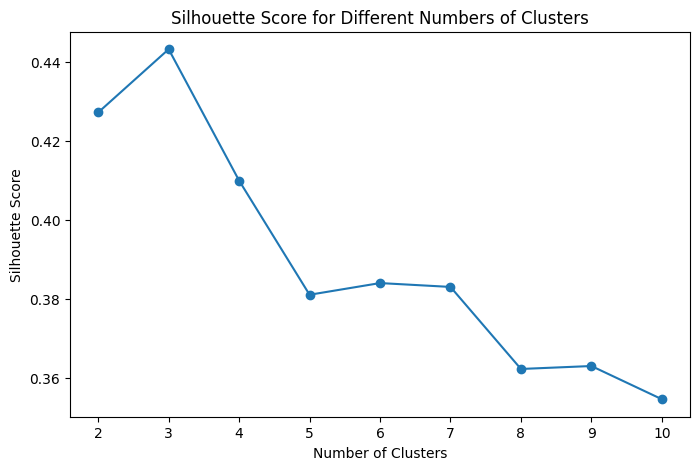

In [32]:
# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The plot shows the silhouette scores for different numbers of clusters, ranging from 2 to 10. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

In [33]:
kmeans.cluster_centers_

array([[ 0.96823603, -0.20769578,  0.17641149],
       [-0.70891355,  0.19979589,  0.91665256],
       [-0.83059708, 10.72654795,  3.35597082],
       [-0.59832341, -0.35275472, -0.9499619 ],
       [ 2.00219985, -0.38821892, -1.11681873],
       [-0.86783018,  3.68308071,  2.3744511 ],
       [ 0.79093389, -0.37097454, -0.99441401],
       [-0.62334148, -0.18586119,  0.05681923],
       [-0.95705645, 27.72926805,  3.55023415],
       [-0.79966854,  1.20699694,  1.70148408]])

In [34]:
kmeans.labels_

array([9, 1, 1, ..., 4, 0, 1])

In [35]:
rfm_scaled

array([[ 0.59558355,  0.43899789,  3.20621937],
       [-0.95227909,  0.13150188,  1.21599349],
       [-0.60353226, -0.09912012,  0.57318471],
       ...,
       [ 2.19599709, -0.40661612, -0.54704249],
       [ 1.31696398, -0.32974212,  0.25347909],
       [-0.75640758,  0.05462788,  1.09865484]])

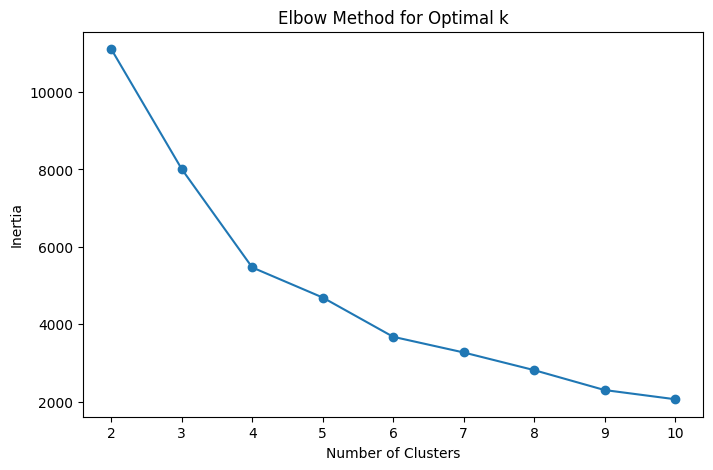

In [36]:
# Plot inertia values (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [37]:
# Determine optimal number of clusters
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# Apply KMeans Clustering with optimal clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans_optimal.fit_predict(rfm_scaled)
rfm['Cluster']

Customer ID
12346.0    1
12347.0    1
12348.0    1
12349.0    1
12350.0    0
          ..
18283.0    1
18284.0    0
18285.0    0
18286.0    0
18287.0    1
Name: Cluster, Length: 5878, dtype: int32

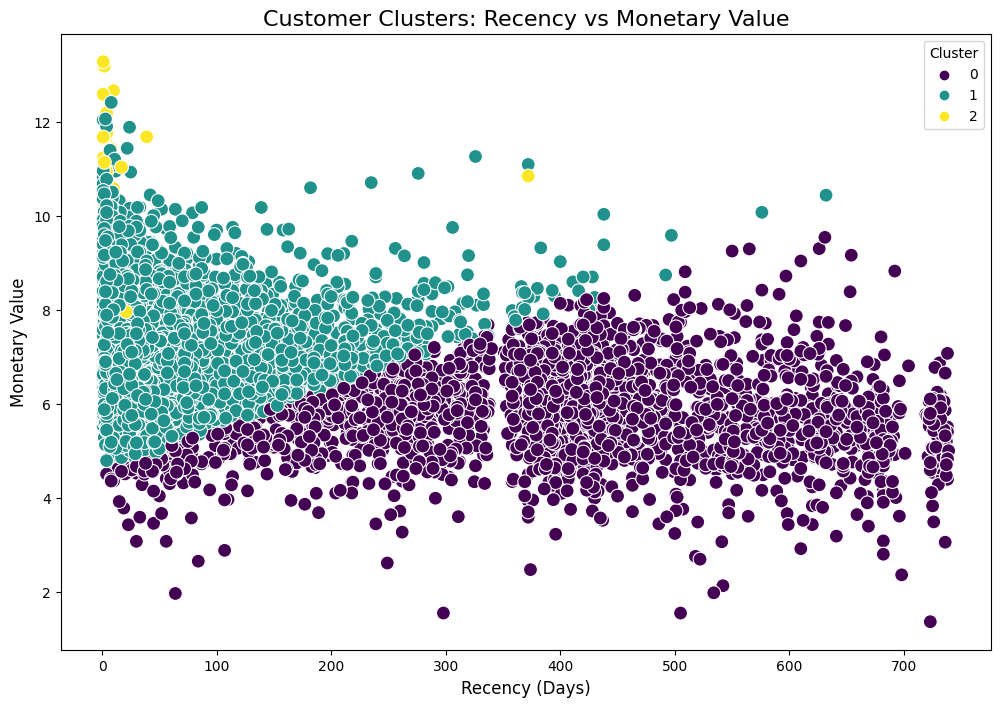

In [38]:
# Visualization: Cluster Profiles
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters: Recency vs Monetary Value', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary Value', fontsize=12)
plt.legend(title='Cluster')
plt.show()

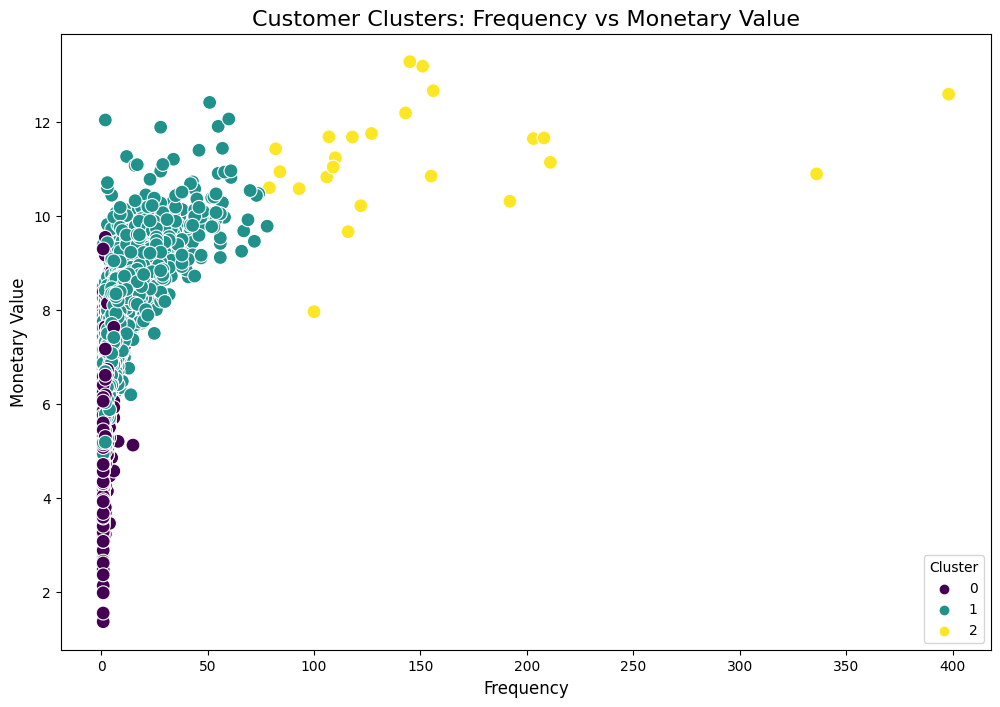

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters: Frequency vs Monetary Value', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Monetary Value', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [40]:
print(kmeans_optimal.cluster_centers_)

print(kmeans_optimal.labels_)

[[ 1.03213406 -0.33705387 -0.74683172]
 [-0.65834442  0.14134314  0.45901898]
 [-0.8595188  11.2109672   3.19636279]]
[1 1 1 ... 0 0 1]


at 3 Clusters: The highest silhouette score is at 3 clusters, suggesting that this number of clusters provides the best separation and cohesion among the data points.
Decreasing Trend: After 3 clusters, the silhouette score generally decreases, indicating that adding more clusters does not improve the clustering quality.
Optimal Clustering: Based on this plot, using 3 clusters is likely the optimal choice for this dataset, as it maximizes the silhouette score

C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarn

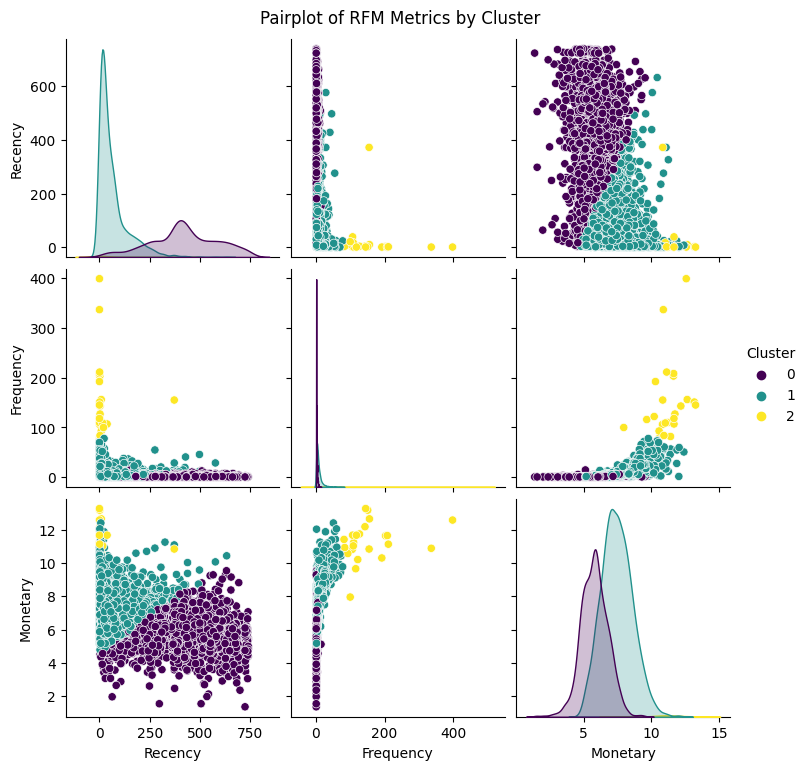

In [41]:
# Pairplot
sns.pairplot(rfm, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of RFM Metrics by Cluster', y=1.02)
plt.show()

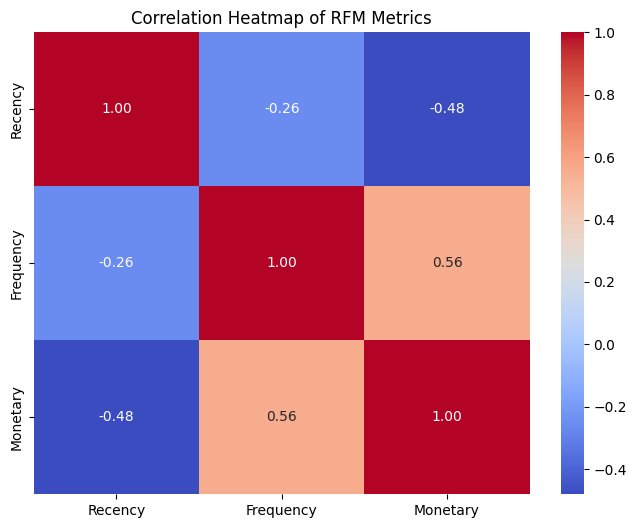

In [42]:
# Heatmap
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()

C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


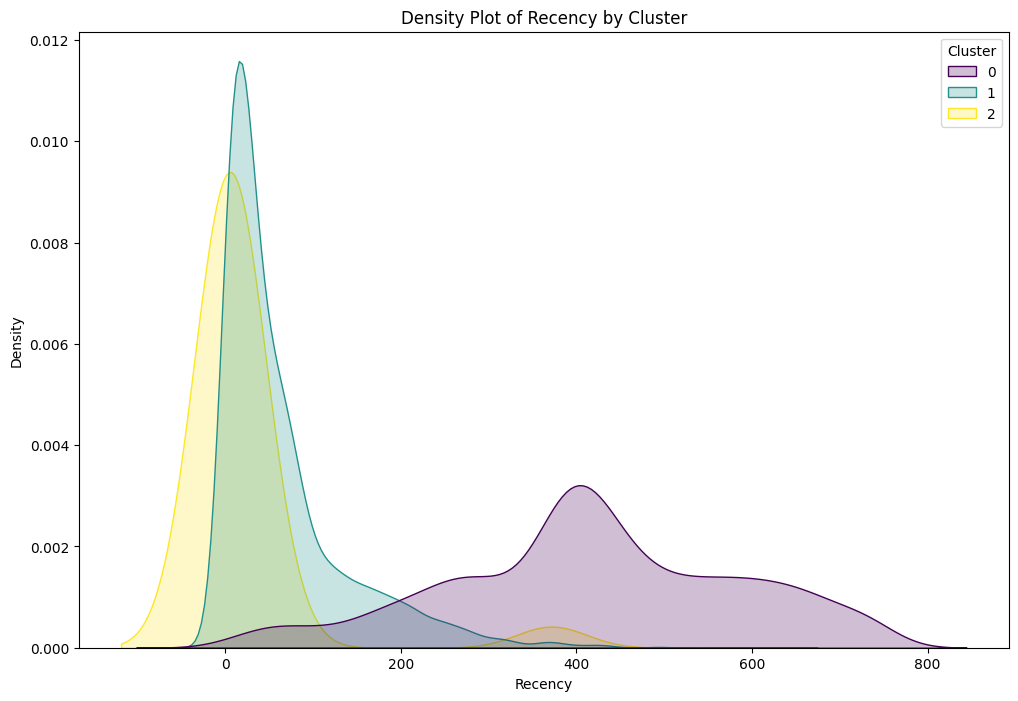

C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


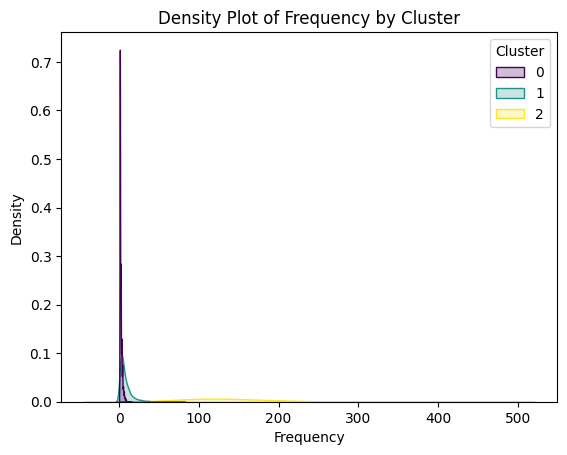

C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sawsa\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


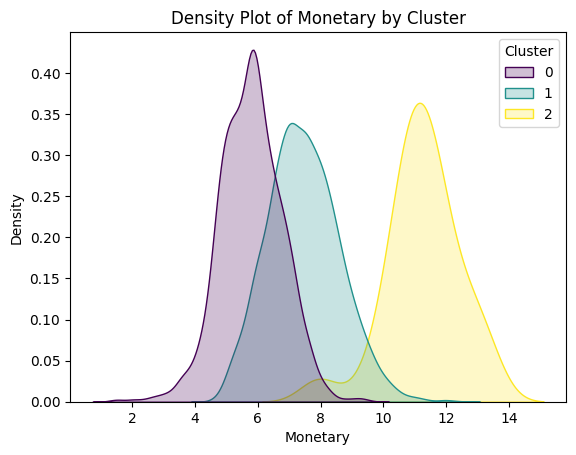

In [43]:
# Density Plots
plt.figure(figsize=(12, 8))
for metric in ['Recency', 'Frequency', 'Monetary']:
    sns.kdeplot(data=rfm, x=metric, hue='Cluster', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Density Plot of {metric} by Cluster')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.show()

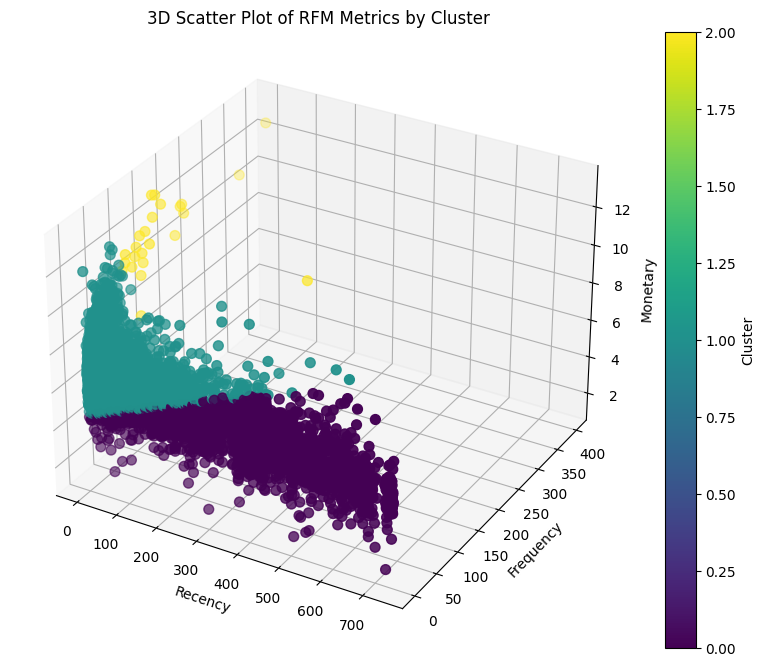

In [44]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot of RFM Metrics by Cluster')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

# Visualization: Cluster Profiles


In [45]:

from math import pi

In [46]:
# Step 1: Calculate RFM Averages for Each Cluster
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()


In [47]:
# Step 2: Assign Descriptive Labels
def assign_labels(row):
    if row['Monetary'] > 4 and row['Frequency'] > 10:
        return 'High Spenders'
    elif row['Recency'] > 100:
        return 'Dormant Customers'
    else:
        return 'Regular Customers'

cluster_profiles['Label'] = cluster_profiles.apply(assign_labels, axis=1)

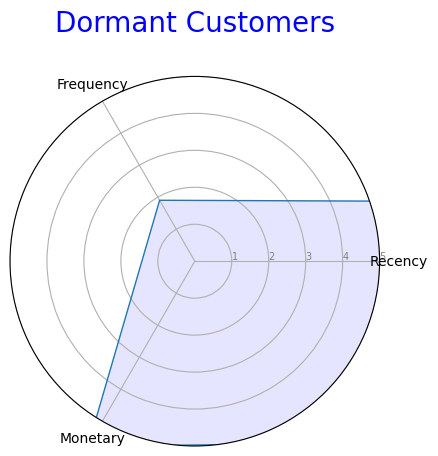

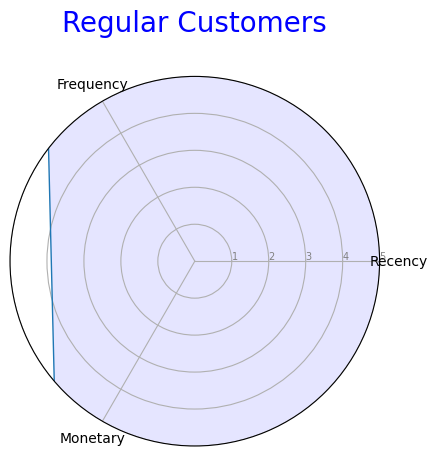

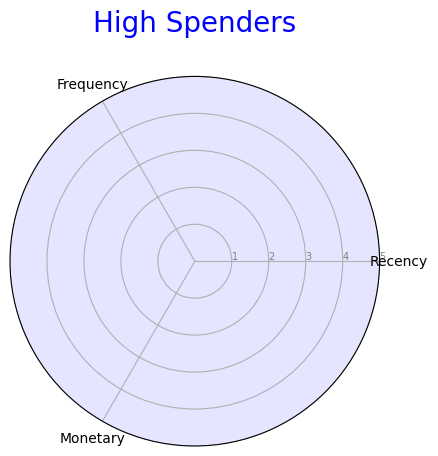

In [48]:
# Step 3: Visualize Using Radar/Spider Charts
def plot_radar_chart(df, title):
    categories = list(df)[1:-1]
    N = len(categories)

    # Calculate the angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    # Initialize the radar plot
    ax = plt.subplot(111, polar=True)

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
    plt.ylim(0, 5)

    # Plot data
    values = df.iloc[0, 1:-1].values.flatten().tolist()  # Ensure correct slicing
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Title
    plt.title(title, size=20, color='blue', y=1.1)

# Plot radar charts for each cluster
for index, row in cluster_profiles.iterrows():
    plot_radar_chart(cluster_profiles[cluster_profiles['Cluster'] == row['Cluster']], row['Label'])
    plt.show()
    
    

## Explanation of the Radar Chart Output
The radar chart visualizes the characteristics of a specific customer cluster labeled as "Dormant Customers." Each axis represents one of the RFM metrics: Recency, Frequency, and Monetary. The values on these axes indicate the average behavior of customers in this cluster:


**Recency:** High value suggests these customers have not made recent purchases.

**Frequency**: Low value indicates infrequent purchases.

**Monetary**: Low value shows minimal spending.

In [49]:
rfm.sample(20)

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
14139.0,46,4,6.991913,1
14231.0,184,4,7.120137,1
15177.0,426,1,6.856388,0
13671.0,395,1,5.156754,0
18013.0,155,2,5.237983,0
16683.0,534,1,5.772220,0
17468.0,10,3,5.277094,1
13283.0,60,4,5.925218,1
15402.0,149,6,7.512912,1


C:\Users\sawsa\AppData\Local\Temp\ipykernel_21408\1888425606.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rfm['Recency'], rfm['Cluster'], c='blue', cmap='coolwarm')


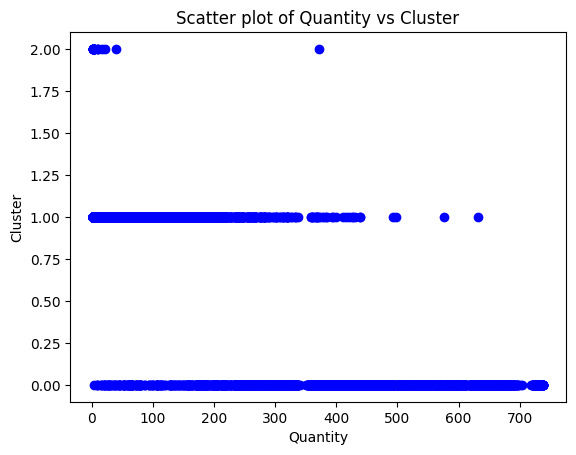

In [50]:
# Assuming 'Quantity' and 'Price' are the columns you want to plot
plt.scatter(rfm['Recency'], rfm['Cluster'], c='blue', cmap='coolwarm')
plt.xlabel('Quantity')
plt.ylabel('Cluster')
plt.title('Scatter plot of Quantity vs Cluster')
plt.show()

C:\Users\sawsa\AppData\Local\Temp\ipykernel_21408\3551220550.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rfm['Monetary'], rfm['Cluster'], c='blue', cmap='coolwarm')


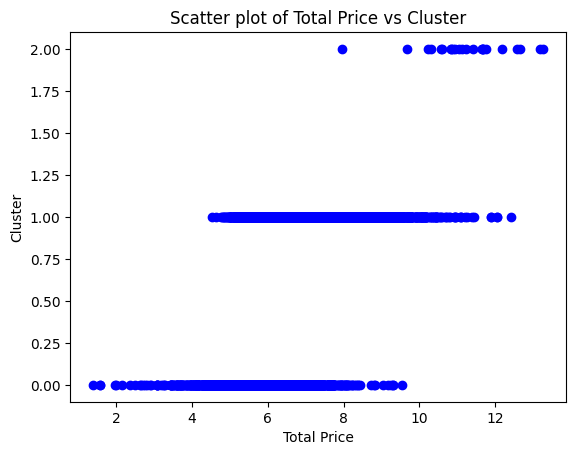

In [51]:
# Assuming 'Quantity' and 'Price' are the columns you want to plot
plt.scatter(rfm['Monetary'], rfm['Cluster'], c='blue', cmap='coolwarm')
plt.xlabel('Total Price')
plt.ylabel('Cluster')
plt.title('Scatter plot of Total Price vs Cluster')
plt.show()

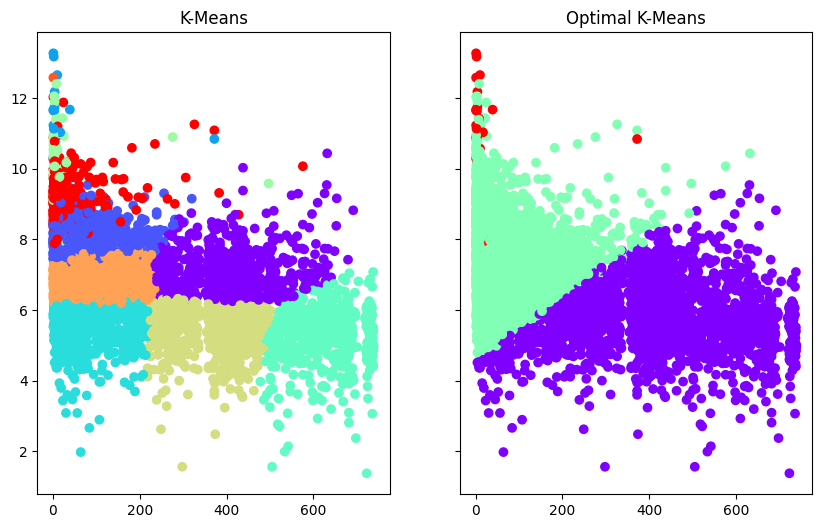

In [52]:
# Assuming 'Quantity' and 'TotalPrice' are the columns you want to plot
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax1.set_title('K-Means')
ax1.scatter(rfm['Recency'], rfm['Monetary'], c=kmeans.labels_, cmap='rainbow')
ax2.set_title("Optimal K-Means")
ax2.scatter(rfm['Recency'], rfm['Monetary'], c=kmeans_optimal.labels_, cmap='rainbow')
plt.show()

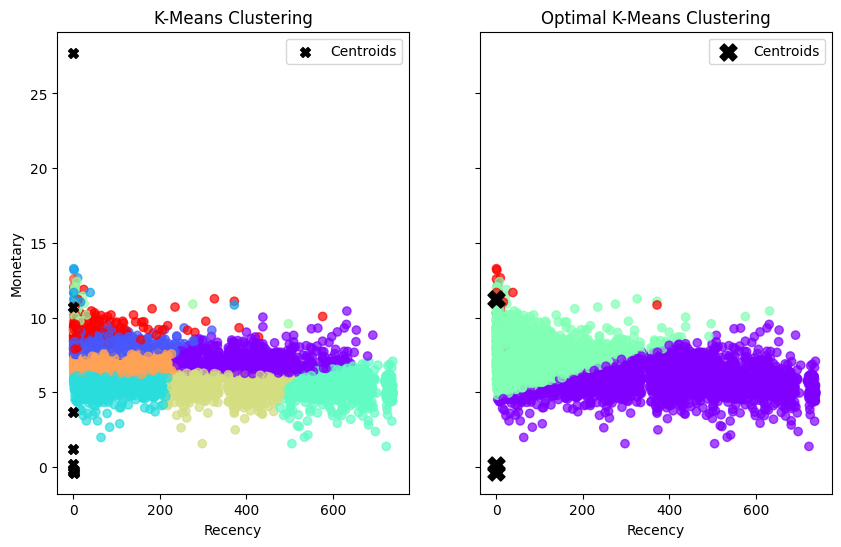

In [53]:
# Assuming kmeans and kmeans_optimal have 'cluster_centers_' attribute
kmeans_centers = kmeans.cluster_centers_
kmeans_optimal_centers = kmeans_optimal.cluster_centers_

# Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Plot for K-Means
ax1.set_title('K-Means Clustering')
scatter1 = ax1.scatter(rfm['Recency'], rfm['Monetary'], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
ax1.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=50, c='black', marker='X', label='Centroids')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Monetary')
ax1.legend()

# Plot for Optimal K-Means
ax2.set_title("Optimal K-Means Clustering")
scatter2 = ax2.scatter(rfm['Recency'], rfm['Monetary'], c=kmeans_optimal.labels_, cmap='rainbow', alpha=0.7)
ax2.scatter(kmeans_optimal_centers[:, 0], kmeans_optimal_centers[:, 1], s=150, c='black', marker='X', label='Centroids')
ax2.set_xlabel('Recency')
ax2.legend()

In [54]:
rfm.shape

(5878, 4)

In [55]:
print(rfm['Cluster'].value_counts())

Cluster
1    3573
0    2281
2      24
Name: count, dtype: int64


In [56]:
# Melt for visualization
cluster_profiles_melted = cluster_profiles.melt(id_vars='Cluster', var_name='Metric', value_name='Value')


In [57]:
# Inspect the DataFrame
cluster_profiles_melted.head()
cluster_profiles_melted.dtypes


Cluster     int32
Metric     object
Value      object
dtype: object

In [58]:

# Ensure 'Value' is numeric
cluster_profiles_melted['Value'] = pd.to_numeric(cluster_profiles_melted['Value'], errors='coerce')

# Check again after conversion
print(cluster_profiles_melted.dtypes)


Cluster      int32
Metric      object
Value      float64
dtype: object


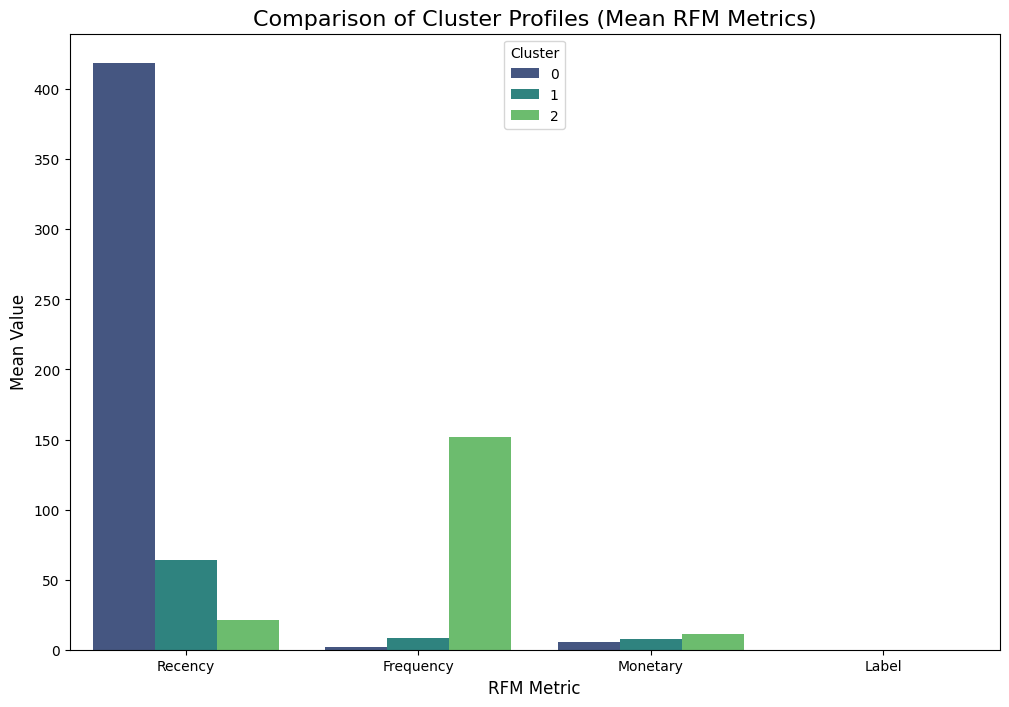

In [59]:

# Bar plot to compare clusters
plt.figure(figsize=(12, 8))
sns.barplot(data=cluster_profiles_melted, x='Metric', y='Value', hue='Cluster', palette='viridis')
plt.title('Comparison of Cluster Profiles (Mean RFM Metrics)', fontsize=16)
plt.xlabel('RFM Metric', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Cluster')
plt.show()